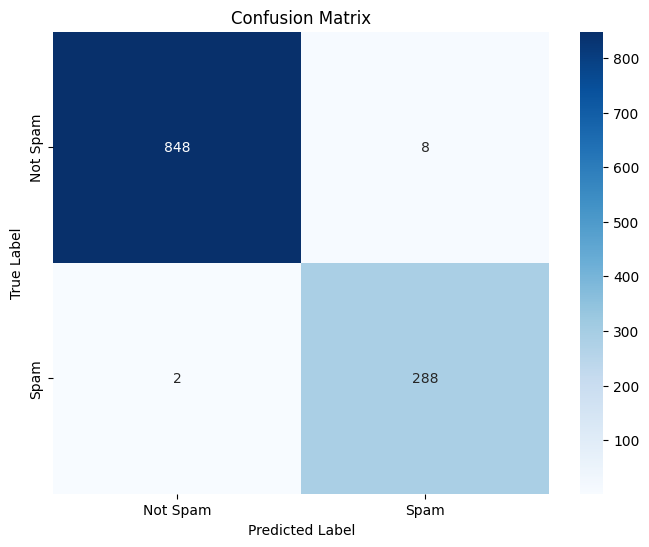


Classification Report:
              precision    recall  f1-score   support

    Not Spam       1.00      0.99      0.99       856
        Spam       0.97      0.99      0.98       290

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



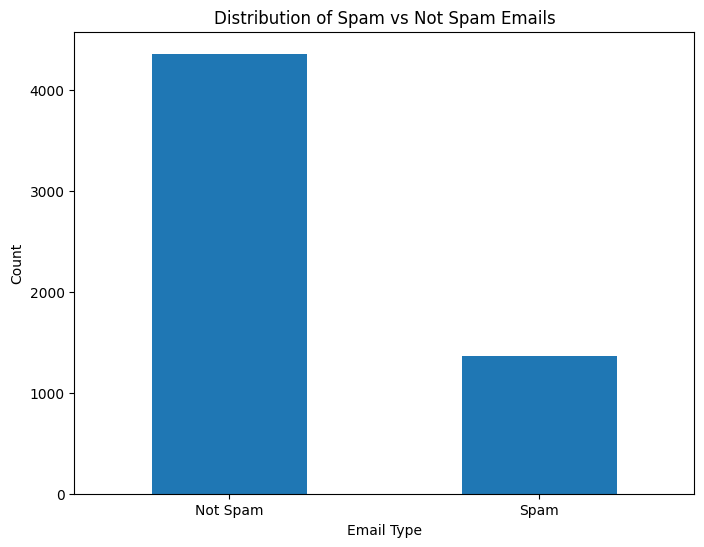


Model Accuracy: 99.13%


In [7]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the data
emails = pd.read_csv('3_emails.csv')

# Create feature vectors
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(emails['text'])
y = emails['spam']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Spam', 'Spam'],
            yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=['Not Spam', 'Spam']))

# Plot class distribution
plt.figure(figsize=(8, 6))
emails['spam'].value_counts().plot(kind='bar')
plt.title('Distribution of Spam vs Not Spam Emails')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Spam', 'Spam'], rotation=0)
plt.show()

# Print model accuracy
print(f'\nModel Accuracy: {nb_classifier.score(X_test, y_test):.2%}')